
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Convex and Distributed Optimization</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a><br/>
<a href="https://ljk.imag.fr/membres/Jerome.Malick/" style="font-size: 16px; font-weight: bold">Jérôme Malick</a><br/>
<a href="https://tropars.github.io/" style="font-size: 16px; font-weight: bold">Thomas Ropars</a><br/>2017/2018 </td>
</tr>
</table>


<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Lab. 1 - Incremental algorithms </a></center>

<br/>

---

In [1]:
import lib.notebook_setting as nbs
import warnings

warnings.filterwarnings('ignore')

packageList = ['IPython', 'numpy', 'matplotlib', 'pandas' , 'sklearn']
nbs.packageCheck(packageList)

nbs.cssStyling()

[Python version] 	3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]

[Packages versions]

IPython             :	6.2.1
numpy               :	1.12.1
matplotlib          :	2.1.1
pandas              :	0.22.0
sklearn             :	0.19.1


<br/><b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; 1) <a href="#Classif"> Classification </a><br/>
&nbsp;&nbsp;&nbsp; 2) <a href="#Student"> the Student Performance Dataset</a><br/>
&nbsp;&nbsp;&nbsp; 3) <a href="#Optim"> Logisitic loss optimization </a><br/>
&nbsp;&nbsp;&nbsp; 4) <a href="#Incremental"> Incremental algorithms </a><br/>
&nbsp;&nbsp;&nbsp; 5) <a href="#LS"> Larger-scale experiments </a><br/>

<div class="warn"><b>Warning:</b> This lab assumes basic knowledge about Python and basic machine learning libraries (numpy, scikit-learn, pandas). If you are not familiar with those, check out <a href="https://github.com/iutzeler/Introduction-to-Python-for-Data-Sciences">this introduction</a>. </div>


## <a id="Classif"> 1) Classification</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



The problem of classfication if the one of finding rules for assigning a class to a given vector from already classified data, for instance, the 2D points below:

[[ -9.46919425e-01  -2.13903597e+00]
 [ -2.72610707e+00  -5.06186514e+00]
 [ -2.24209576e+00  -1.29901759e+00]
 [ -1.93127085e+00   1.95574242e-01]
 [ -9.83070494e-01  -2.42695118e-04]] [1 1 0 0 0]


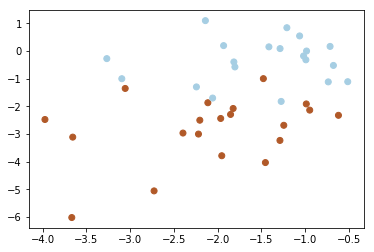

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

# we create 40 separable points in R^2 around 2 centers
X, y = make_blobs(n_samples=40, n_features=2, centers=2 , random_state=48443)

print(X[:5,:],y[:5]) # print the first 5 points and labels

plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.Paired);

Support Vector Machines (SVM) are based on learning a vector $w$ and an intercept $b$ such that the hyperplane $w^T x - b = 0$ separates the data i.e.  $a$ belongs to one class if  $w^T a - b > 0$ and the other elsewhere. 


The ``scikit-learn`` library provides a classification module:

In [3]:
from sklearn.svm import SVC # Support vector classifier i.e. Classifier by SVM

modelSVMLinear = SVC(kernel="linear")
modelSVMLinear.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The following illustration can be found in the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[ 0], alpha=0.5,    linestyles=[ '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

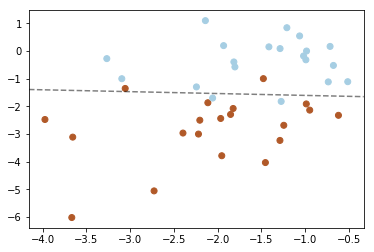

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y ,  cmap=plt.cm.Paired)
plot_svc_decision_function(modelSVMLinear)

We see clearly that the linear SVM seeks at maximizing the *margin* between the hyperplane and the two well defined classes from the data. 

## <a id="Student"> 2) the Student Performance Dataset </a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We will consider the <a href="http://archive.ics.uci.edu/ml/datasets/Student+Performance">student performance</a> dataset. The goal is to predict if the student will pass (i.e. the final grade is greater than 12) from the other information, we get from the documentation:

Pandas allows for easy reading and provides a dataframe of the dataset.

In [6]:
import pandas as pd
import numpy as np

student = pd.read_csv('data/student-mat.csv')
student.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,2,2,0,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,1,2,0,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,1,2,3,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,1,3,0,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,1,2,0,...,4,3,2,1,2,5,4,6,10,10


In [7]:
target = pd.DataFrame(student["G3"])
features = student.drop(["G3"],axis=1)

To practice DataFrame operations, we first look at the values of the target and features and investigate basic transformations.

### Target

<div class="exo"> <b>Question:</b> Use Pandas's <tt>applymap</tt> function to transform the target from numerical notes to +1 (pass, note >= 12) and -1 (fail, note < 12).<br/>
<i>Hint: create a function return +1 if the input is >= 12 and -1 elsewhere first and apply this function using <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html">applymap</a>.</i>
</div>

In [8]:
target.head(4)

,G3
0,6
1,6
2,10
3,15


In [9]:
def to_class(x):
    if x>=12:
        return +1
    else:
        return -1

target_classes = target.applymap(to_class)

In [10]:
target_classes.head(4)

,G3
0,-1
1,-1
2,-1
3,1


### Features

One immediate problem here is that the features are not *numeric* (not floats). 

<div class="exo"> <b>Question:</b> Use Pandas's <tt>groupby</tt> function to count the number of boys and girls, and the number of people without Internet access. Finally, use <tt>describe</tt> to get age statistics per sex. </i>
</div>

In [11]:
features.groupby("sex")["age"].count()

sex
F    208
M    187
Name: age, dtype: int64

In [12]:
features.groupby("internet")["age"].count()

internet
no      66
yes    329
Name: age, dtype: int64

In [13]:
features.groupby("sex")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,208.0,16.730769,1.201696,15.0,16.0,17.0,18.0,20.0
M,187.0,16.657754,1.356181,15.0,16.0,16.0,18.0,22.0


Categorical features are not supported natively by optimizers; thankfully, Scikit Learn provides [encoders](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) to convert categorical (aka nominal, discrete) features to numerical ones.

In [14]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
num_features = features.apply(lenc.fit_transform)

In [15]:
num_features.head() 

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,3,1,0,0,4,4,1,1,0,...,0,3,2,3,0,0,2,6,2,3
1,0,2,1,0,1,1,1,0,1,0,...,0,4,2,2,0,0,2,4,2,2
2,0,0,1,1,1,1,1,0,1,3,...,0,3,2,1,1,2,2,10,4,5
3,0,0,1,0,1,4,2,0,2,0,...,1,2,1,1,0,0,4,2,12,11
4,0,1,1,0,1,3,3,0,1,0,...,0,3,2,1,0,1,4,4,3,7


Even numerical values were encoded, as we are going to normalize, it is not really important. 

The normalization is done by removing the mean and equalizing the variance per feature, in addition, we are going to add an intercept.

In [16]:
from sklearn.preprocessing import StandardScaler, add_dummy_feature

scaler = StandardScaler()
normFeatures = add_dummy_feature(scaler.fit_transform(num_features))

In [17]:
preproData = pd.DataFrame(normFeatures , columns=[ "intercept" ] + list(num_features.columns) )

In [18]:
preproData.describe().T

,count,mean,std,min,25%,50%,75%,max
intercept,395.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sex,395.0,-4.834389e-17,1.001268,-0.948176,-0.948176,-0.948176,1.054656,1.054656
age,395.0,-8.207218e-17,1.001268,-1.330954,-0.546287,0.238380,1.023046,4.161713
address,395.0,6.998621e-17,1.001268,-1.867789,0.535392,0.535392,0.535392,0.535392
famsize,395.0,1.281675e-16,1.001268,-0.636941,-0.636941,-0.636941,1.570004,1.570004
Pstatus,395.0,-1.503720e-16,1.001268,-2.938392,0.340322,0.340322,0.340322,0.340322
Medu,395.0,8.432074e-18,1.001268,-2.514630,-0.685387,0.229234,1.143856,1.143856
Fedu,395.0,-1.264811e-16,1.001268,-2.320084,-0.479857,-0.479857,0.440257,1.360371
traveltime,395.0,-2.248553e-16,1.001268,-0.643249,-0.643249,-0.643249,0.792251,3.663251
studytime,395.0,3.147974e-17,1.001268,-1.235351,-1.235351,-0.042286,-0.042286,2.343844


<div class="exo"> <b>Question:</b> Use Scikit-Learn to split the dataset into learning and training sets with <tt>train_test_split</tt>.
</div>

In [19]:
try:
    from sklearn.model_selection import train_test_split    # sklearn > ...
except:
    from sklearn.cross_validation import train_test_split   # sklearn < ...
    
XTrain, XTest, yTrain, yTest = train_test_split(preproData,target_classes,test_size = 0.25) # split data in two

Now let us solve this classification problem using scikit learn's routines.

<div class="exo"> <b>Question:</b> Use Scikit-Learn to perform a first classification and evaluate the obtained performance.
</div>

In [20]:
from sklearn.svm import SVC # Support vector classifier i.e. Classifier by SVM

modelSVMLinear = SVC(kernel="linear")
modelSVMLinear.fit(XTrain,yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,15,'predicted label')

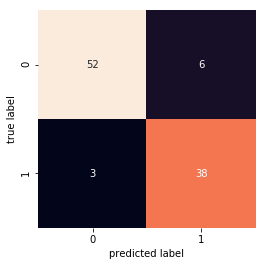

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


yPred = modelSVMLinear.predict(XTest)
mat = confusion_matrix(yTest, yPred)

sns.heatmap(mat, square=True, annot=True ,cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

<div class="warn"><b>Warning:</b> Scikit-learn provides efficient classification routines for up to medium scale datasets. However, to treat larger datasets, it is fundamental to understand the optimization problems and minimization methods.</div>

## <a id="Optim"> 3) Logistic loss Optimization</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We start the optimization part of the lab.

In our classification setup, the observations are binary in $\{-1 , +1 \}$, and the *Logistic loss* is used to form the following optimization problem
\begin{align*}
\min_{x\in\mathbb{R}^d } f(x) := \frac{1}{m}  \sum_{i=1}^m \log( 1+\exp(-b_i \langle a_i,x \rangle) ) + \frac{\lambda}{2} \|x\|_2^2 .
\end{align*}
where the last term is added as a regularization (of type $\ell_2$, aka Tikhnov) to prevent overfitting. This function is **$L$-smooth and $\lambda$ strongly-convex.**

Under some statistical hypotheses, $x^\star = \arg\min f(x)$ maximizes the likelihood of the labels knowing the features vector. Then, for a new point $d$ with features vector $a$, 
$$ p_1(a) = \mathbb{P}[a\in \text{ class }  +1] = \frac{1}{1+\exp(-\langle a;x^\star \rangle)} $$
Thus, from $a$, if $p_1(a)$ is close to $1$, one can decide that $d$ belongs to class $1$; and the opposite decision if $p(a)$ is close to $0$. Between the two, the appreciation is left to the data scientist depending on the application.


In [22]:
lam = 0.001 #  REGULARIZATION 

m,n = XTrain.shape # SIZES: m = Number of examples n = feature size 

L = 0.25*max(np.linalg.norm(preproData.values,2,axis=1))**2 + lam # Lispchitz constant of f
mu = lam # Strong convexity constant

Below find the oracles functions for f and its gradient (taken from the resfresher course).

In [23]:
def f(x):
    A = XTrain.values
    b = yTrain.values
    l = 0.0
    for i in range(A.shape[0]):
        if b[i] > 0 :
            l += np.log( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
        else:
            l += np.log( 1 + np.exp(np.dot( A[i] , x ) ) ) 
    return l/m + lam/2.0*np.dot(x,x)

In [24]:
def f_grad(x):
    A = XTrain.values
    b = yTrain.values
    g = np.zeros(n)
    for i in range(A.shape[0]):
        if b[i] > 0:
            g += -A[i]/( 1 + np.exp(np.dot( A[i] , x ) ) ) 
        else:
            g += A[i]/( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
    return g/m + lam*x

<div class="exo"> <b>Question:</b> Implement a gradient descent algorithm on f and display its results in terms of functional decrease on the training set.
</div>

In [25]:
import timeit

def gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX ):
    x = np.copy(x0)
    stop = PREC*np.linalg.norm(f_grad(x0) )

    x_tab = np.copy(x)
    print("------------------------------------\n Constant Stepsize gradient\n------------------------------------\nSTART    -- stepsize = {:0}".format(step))
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        g = f_grad(x)
        x = x - step*g  #######  ITERATION

        x_tab = np.vstack((x_tab,x))

        if np.linalg.norm(g) < stop:
            break
    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [26]:
#### Parameter we give at our algorithm 
PREC    = 1e-5                     # Sought precision
ITE_MAX = 500                      # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 1.99/(L)

##### gradient algorithm
x,x_tab = gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX )

------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.08009854069649297
FINISHED -- 499 iterations / 0.781601s -- final value: 0.177220




In [27]:
F =  []
for i in range(x_tab.shape[0]):
    F.append(f(x_tab[i,:]))

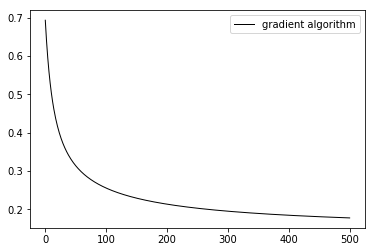

In [28]:
plt.plot(F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.legend();

<div class="exo"> <b>Question:</b> Plot the confusion matrix on the testing set.
</div>

In [29]:
yPredLog = np.sign( 1/(1.0 + np.exp( - (XTest.values).dot(x) )) - 0.5) # +1 if Prob (a) > 0.5

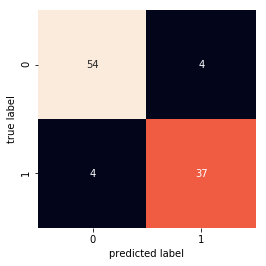

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(yTest, yPredLog)

sns.heatmap(mat, square=True, annot=True ,cbar=False);
plt.ylabel('true label');
plt.xlabel('predicted label');

## <a id="Incremental"> 4) Incremental Algorithms</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



\begin{align*}
\min_{x\in\mathbb{R}^d } f(x) := \frac{1}{m}  \sum_{i=1}^m \underbrace{ \left(  \log( 1+\exp(-b_i \langle a_i,x \rangle) ) + \frac{\lambda}{2m} \|x\|_2^2 \right)}_{f_i(x)}.
\end{align*}

<div class="exo"> <b>Question:</b> Define the oracle for the gradient based on only one training example $\nabla f_i(x)$.</div>

In [31]:
def f_grad_ex(i,x):
    A = XTrain.values[i,:]
    b = yTrain.values[i]
    g = np.zeros(n)
    if b > 0:
        g += -A/( 1 + np.exp(np.dot( A , x ) ) ) 
    else:
        g += A/( 1 + np.exp(-np.dot( A , x ) ) ) 
    return g + lam*x/m

<div class="exo"> <b>Question:</b> Implement a stochastic gradient descent algorithm.<br/>
<i>Hint: use <tt>np.random.choice</tt> to draw an example.</i></div>

In [32]:
import timeit

def stochastic_gradient_algorithm(f , f_grad_ex , x0  , ITE_MAX ):
    x = np.copy(x0)

    x_tab = np.copy(x)
    print("------------------------------------\n Stochastic gradient\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        
        i = np.random.choice(m)
        step = 1.0/(L*(k+1)**0.7)
        
        g = f_grad_ex(i,x)
        x = x - step*g  #######  ITERATION

        x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [33]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point

##### gradient algorithm
x_sto,x_sto_tab = stochastic_gradient_algorithm(f , f_grad_ex , x0   , ITE_MAX )

------------------------------------
 Stochastic gradient
------------------------------------
START 
FINISHED -- 9999 iterations / 5.169261s -- final value: 0.387485




In [34]:
F_sto =  []
Ite_sto = []
for i in range(0,x_sto_tab.shape[0],int(x_sto_tab.shape[0]/500.0)):
    F_sto.append(f(x_sto_tab[i,:]))
    Ite_sto.append(i)

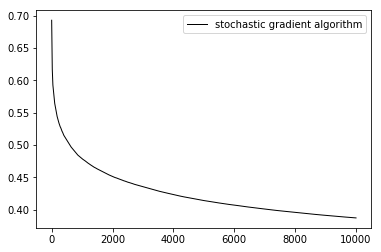

In [35]:
plt.plot(Ite_sto, F_sto, color="black", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.legend();

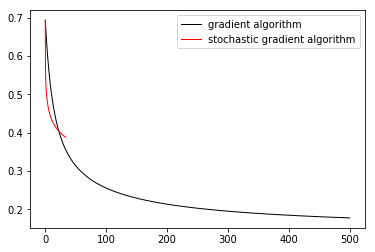

In [36]:
plt.plot( F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.plot([x/float(m) for x in Ite_sto], F_sto, color="red", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.legend();

<div class="exo"> <b>Question:</b> Implement SAGA and SVRG algorithms on the previous problem and compare with the gradient in terms of loss vs. number of passes over the data and time.</div>

In [37]:
import timeit

def SAGA(f , f_grad_ex , x0 , step  , ITE_MAX ):
    x = np.copy(x0)
    p_tab = np.zeros((m,x0.size))
    
    x_tab = np.copy(x)
    print("------------------------------------\n SAGA\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        
        e = np.random.choice(m)
                
        g = f_grad_ex(e,x)
        
        x = x - step*(g - p_tab[e,:] + sum(p_tab)/float(m) )
        
        p_tab[e,:] = np.copy(g)

        x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [38]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 1/(2*(mu*m + L))

##### gradient algorithm
x_saga,x_saga_tab = SAGA(f , f_grad_ex , x0 , step  , ITE_MAX )

------------------------------------
 SAGA
------------------------------------
START 
FINISHED -- 9999 iterations / 6.919824s -- final value: 0.148853




In [39]:
F_saga =  []
Ite_saga = []
for i in range(0,x_saga_tab.shape[0],int(x_saga_tab.shape[0]/500.0)):
    F_saga.append(f(x_saga_tab[i,:]))
    Ite_saga.append(i)

In [40]:
import timeit

def SVRG(f ,  f_grad_ex , x0 , step  , ITE_MAX ):
    x = np.copy(x0)
    p_tab = np.zeros((m,x0.size))
    
    M = 20
    
    x_tab = np.copy(x)
    print("------------------------------------\n SVRG\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(int(ITE_MAX/M)):
        
        for i in range(m):
            p_tab[i,:] = f_grad_ex(i,x)
        
        true_grad = sum(p_tab)/float(m)
        
        for j in range(M):
            e = np.random.choice(m)
              
            g = f_grad_ex(e,x)
        
            x = x - step*(g - p_tab[e,:] +true_grad )
        
            x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [41]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 0.1/( L)

##### gradient algorithm
x_svrg,x_svrg_tab = SVRG(f , f_grad_ex , x0 , step  , ITE_MAX )

------------------------------------
 SVRG
------------------------------------
START 
FINISHED -- 499 iterations / 8.453958s -- final value: 0.175795




In [42]:
F_svrg =  []
Ite_svrg = []
for i in range(0,x_svrg_tab.shape[0],int(x_svrg_tab.shape[0]/500.0)):
    F_svrg.append(f(x_svrg_tab[i,:]))
    Ite_svrg.append(i)

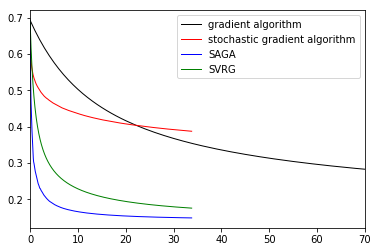

In [43]:
plt.plot( F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.plot([x/float(m) for x in Ite_sto], F_sto, color="red", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.plot([x/float(m) for x in Ite_saga], F_saga, color="blue", linewidth=1.0, linestyle="-", label="SAGA");
plt.plot([x/float(m) for x in Ite_svrg], F_svrg, color="green", linewidth=1.0, linestyle="-", label="SVRG");
plt.xlim([0,70])
plt.legend();

## <a id="LS"> 5) Larger-Scale experiments</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



The ``covtype`` dataset is slightly bigger: 581012 examples with 54 features. It represents forest cover type from cartographic variables only (no remotely sensed data) on 30 x 30 meter cell as determined by the US Forest Service (USFS). The features are as follows:

In [44]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file("data/covtype.libsvm.binary")

FileNotFoundError: [Errno 2] No such file or directory: 'data/covtype.libsvm.binary'

In [ ]:
from sklearn.preprocessing import StandardScaler, add_dummy_feature
import numpy as np

X = np.array(X.todense())

scaler = StandardScaler()
normFeatures = add_dummy_feature(scaler.fit_transform(X))

y = np.sign(y-1.5)

In [ ]:
CUTOFF = 1000 # We limit ourselves to 10000 samples
m = CUTOFF
X = X[:CUTOFF,:]
y = y[:CUTOFF]

In [ ]:
try:
    from sklearn.model_selection import train_test_split    # sklearn > ...
except:
    from sklearn.cross_validation import train_test_split   # sklearn < ...
    
XCovTrain, XCovTest, yCovTrain, yCovTest = train_test_split(X,y,test_size = 0.5) # split data in two

m,n = XCovTrain.shape

<div class="exo"> <b>Question:</b> Compare SGD and SAGA on this dataset.</div>

In [ ]:
import numpy as np

lam = 1.0/m
L = 0.25*max(np.linalg.norm(XCovTrain,2,axis=1))**2 + lam # Lispchitz constant of f
mu = lam # Strong convexity constant


def f(x):
    A = XCovTrain
    b = yCovTrain
    l = 0.0
    for i in range(A.shape[0]):
        if b[i] > 0 :
            l += np.log( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
        else:
            l += np.log( 1 + np.exp(np.dot( A[i] , x ) ) ) 
    return l/m + lam/2.0*np.dot(x,x)


def f_grad_ex(i,x):
    A = XCovTrain[i,:]
    b = yCovTrain[i]
    g = np.zeros(n)
    if b > 0:
        g +=  -A/( 1 + np.exp(np.dot( A , x ) ) ) 
    else:
        g +=  A/( 1 + np.exp(-np.dot( A , x ) ) ) 
    return g + lam*x/m

In [ ]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                     # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 1.0/(2*(mu*m + L))

##### gradient algorithm
x_sagaC,x_sagaC_tab = SAGA(f , f_grad_ex , x0 , step  , ITE_MAX )

In [ ]:
F_sagaC =  []
Ite_sagaC = []
for i in range(0,x_sagaC_tab.shape[0],int(x_sagaC_tab.shape[0]/500.0)+1):
    F_sagaC.append(f(x_sagaC_tab[i,:]))
    Ite_sagaC.append(i)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot([x/float(m) for x in Ite_sagaC], F_sagaC, color="blue", linewidth=1.0, linestyle="-", label="SAGA");
#plt.xlim([0,1])
plt.legend();

In [ ]:
yPredCov = np.sign( 1/(1.0 + np.exp( - XCovTest.dot(x_sagaC) )) - 0.5) # +1 if Prob (a) > 0.5

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(yCovTest, yPredCov)

sns.heatmap(mat, square=True, annot=True ,cbar=False);
plt.ylabel('true label');
plt.xlabel('predicted label');

In [ ]:
 max( 1/(1.0 + np.exp( - XCovTest.dot(x_sagaC) )) )

---
